In [8]:
import GPy
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('code')
import gp_varsel.code.GP_varsel as varsel
np.random.seed(1)


In [9]:
#Aj are the scaling factors such that the variance of each fj(xj) is one.

def compute_A(m, input_model):
    phi = np.pi*np.linspace(0.1,1,m)
    # if x are uniformly distributed
    # compute the analytical scaling coefficients for the m components
    if input_model =='unif':
        Aunif = np.zeros(m)
        for i in range(0,m):
            Aunif[i] = np.sqrt( 4/(2 -1/phi[i]*np.sin(2*phi[i])) )
        return Aunif
    
    # if x are normally distributed
    # compute the scaling coefficients for the m components
    if input_model =='norm':
        nquadr2 = 11
        [points,weights] = np.polynomial.hermite.hermgauss(nquadr2)
        std = 0.4
        Anor = np.zeros(m)
        for i in range(0, m):
            coeff = np.sin(phi[i]*np.sqrt(2)*std*points)*np.sin(phi[i]*np.sqrt(2)*std*points)
            var = 1.0/np.sqrt(np.pi)*np.dot(coeff.T,weights)
            Anor[i] = 1/np.sqrt(var)
        return Anor

    
def run_repetitions(m, input_model, reps):
    rel_ARD = np.zeros(m)
    rel_KL = np.zeros(m)
    rel_VAR = np.zeros(m)
    
    for i in range(0, repeats):
        if input_model =='unif':
            x = np.random.uniform(-1.,1.,(n,m))
            A = compute_A(m=m, input_model='unif')
            
        if input_model =='norm':
            std = 0.4
            x = np.random.normal(0.0,std,(n,m))
            A = compute_A(m=m, input_model='norm')

        print('starting repetition ', i + 1,'/',repeats)
        phi = np.tile(np.linspace(np.pi/10,np.pi,m),(n,1))
        xphi = np.multiply(x[:,0:m],phi)
        f = np.sin(xphi)
        
        for j in range(0,m):
            f[:,j] = f[:,j]*A[j]

        # y is a sum of the m components plus Gaussian noise
        yval = f.sum(axis=1) + np.random.normal(0,0.3,(n,))
        y = np.asmatrix(yval).T

        # RBF kernel plus constant term
        kernel = GPy.kern.RBF(input_dim=m,ARD=True) + GPy.kern.Bias(input_dim=m)
        model = GPy.models.GPRegression(x,y,kernel)
        model.optimize()

        # ARD relevance value is the inverse of the length scale
        rel_ARD = rel_ARD + 1/model.sum.rbf.lengthscale

        # KL relevance value
        rel_KL = rel_KL + varsel.KLrel(x,model,delta)

        # VAR relevance value
        rel_VAR = rel_VAR + varsel.VARrel(x,model,nquadr)

    return m, rel_ARD, rel_KL, rel_VAR


def normalize_for_plots(m, rel_ARD, rel_KL, rel_VAR):
    # True relevance, the covariates are equally relevant in the L2 sense
    rel_true = np.ones(m)
    
    # normalize the relevance values      
    rel_ARD_nor = rel_ARD/np.max(rel_ARD)
    rel_KL_nor = rel_KL/np.max(rel_KL)
    rel_VAR_nor = rel_VAR/np.max(rel_VAR)
    
    return m, rel_true, rel_ARD_nor, rel_KL_nor, rel_VAR_nor


def plot_relevance_estimates(m, rel_true, rel_ARD_nor, rel_KL_nor, rel_VAR_nor):
    covariates = np.arange(1,m+1) 
    fig2 = plt.figure()
    ax2 = plt.subplot(111)
    ax2.plot(covariates,rel_ARD_nor,'-ob',label='ARD')
    ax2.plot(covariates,rel_KL_nor,'-or',label='KL')
    ax2.plot(covariates,rel_VAR_nor,'-oc',label='VAR')
    ax2.plot(covariates,rel_true,'--ok',label='True')
    ax2.legend()
    ax2.set_ylabel('relevance')
    ax2.set_xlabel('input')
    plt.show()
    


# Experiment Results on Synthetic Data

In [10]:
# number of repetitions to average over
repeats = 200
# number of covariates
m = 8
# number of data points
n = 300
# Delta for KL method
delta = 0.0001
# number of quadrature points for VAR method
nquadr = 11


starting repetition  1 / 200
starting repetition  2 / 200
starting repetition  3 / 200
starting repetition  4 / 200
starting repetition  5 / 200
starting repetition  6 / 200
starting repetition  7 / 200
starting repetition  8 / 200
starting repetition  9 / 200
starting repetition  10 / 200
starting repetition  11 / 200
starting repetition  12 / 200
starting repetition  13 / 200
starting repetition  14 / 200
starting repetition  15 / 200
starting repetition  16 / 200
starting repetition  17 / 200
starting repetition  18 / 200
starting repetition  19 / 200
starting repetition  20 / 200
starting repetition  21 / 200
starting repetition  22 / 200
starting repetition  23 / 200
starting repetition  24 / 200
starting repetition  25 / 200
starting repetition  26 / 200
starting repetition  27 / 200
starting repetition  28 / 200
starting repetition  29 / 200
starting repetition  30 / 200
starting repetition  31 / 200
starting repetition  32 / 200
starting repetition  33 / 200
starting repetition

 /usr/local/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /usr/local/lib/python3.7/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


starting repetition  137 / 200
starting repetition  138 / 200
starting repetition  139 / 200
starting repetition  140 / 200
starting repetition  141 / 200
starting repetition  142 / 200
starting repetition  143 / 200
starting repetition  144 / 200
starting repetition  145 / 200
starting repetition  146 / 200
starting repetition  147 / 200
starting repetition  148 / 200
starting repetition  149 / 200
starting repetition  150 / 200
starting repetition  151 / 200
starting repetition  152 / 200
starting repetition  153 / 200
starting repetition  154 / 200
starting repetition  155 / 200
starting repetition  156 / 200
starting repetition  157 / 200
starting repetition  158 / 200
starting repetition  159 / 200
starting repetition  160 / 200
starting repetition  161 / 200
starting repetition  162 / 200
starting repetition  163 / 200
starting repetition  164 / 200
starting repetition  165 / 200
starting repetition  166 / 200
starting repetition  167 / 200
starting repetition  168 / 200
starting

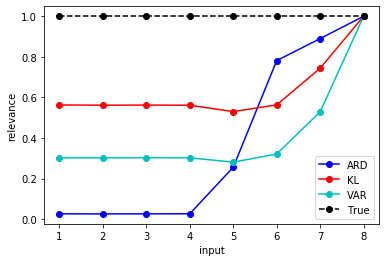

In [11]:
plot_relevance_estimates(*normalize_for_plots(*run_repetitions(m=m, input_model='unif', reps=repeats)))

starting repetition  1 / 200
starting repetition  2 / 200
starting repetition  3 / 200
starting repetition  4 / 200
starting repetition  5 / 200
starting repetition  6 / 200
starting repetition  7 / 200
starting repetition  8 / 200
starting repetition  9 / 200
starting repetition  10 / 200
starting repetition  11 / 200
starting repetition  12 / 200
starting repetition  13 / 200
starting repetition  14 / 200
starting repetition  15 / 200
starting repetition  16 / 200
starting repetition  17 / 200
starting repetition  18 / 200
starting repetition  19 / 200
starting repetition  20 / 200
starting repetition  21 / 200
starting repetition  22 / 200
starting repetition  23 / 200
starting repetition  24 / 200
starting repetition  25 / 200
starting repetition  26 / 200
starting repetition  27 / 200
starting repetition  28 / 200
starting repetition  29 / 200
starting repetition  30 / 200
starting repetition  31 / 200
starting repetition  32 / 200
starting repetition  33 / 200
starting repetition

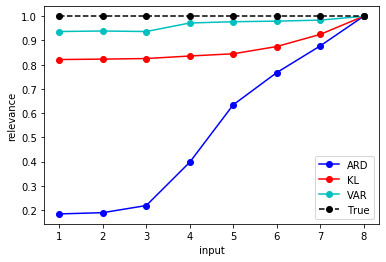

In [12]:
plot_relevance_estimates(*normalize_for_plots(*run_repetitions(m=m, input_model='norm', reps=repeats)))